In [3]:
from google import drive
drive.mount('/content/drive')


ImportError: cannot import name 'drive' from 'google' (unknown location)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# 1) Read the data from the h5py file and understand the train/test splits

In [3]:
import h5py

h= h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

h.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [5]:
X_train = h['X_train'][:]
y_train = h['y_train'][:]
y_test= h['y_test'][:]
X_test = h['X_test'][:]

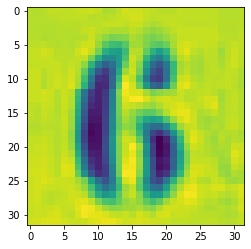

Label:  6


In [6]:
plt.imshow(X_train[1000])    
plt.show()
print('Label: ', y_train[1000])

In [7]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)


(42000, 32, 32)
(42000,)
(18000,)
(18000, 32, 32)


In [8]:
import tensorflow as tf

# 2 Reshape and normalize the train and test features 

In [9]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000,1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


In [10]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


# 3) One hot encode the labels for train and test data

In [11]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

y_test = to_categorical(y_test, num_classes= 10)



In [12]:
print(y_test.shape, y_train.shape)

(18000, 10) (42000, 10)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import *

# 4) Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

MODEL_1

In [93]:
model = Sequential() 
model.add(Dense(50, input_shape = (1024,), activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(50, activation= "sigmoid"))
model.add(Dense(10, activation= "softmax"))

# 5)Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation


In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer= sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 1000, epochs = 100, verbose = 1)

Epoch 1/100
42/42 [==============================] - 1s 13ms/step - loss: 2.4535 - accuracy: 0.1026
Epoch 2/100
42/42 [==============================] - 0s 12ms/step - loss: 2.3668 - accuracy: 0.1040
Epoch 3/100
42/42 [==============================] - 1s 13ms/step - loss: 2.3436 - accuracy: 0.1034
Epoch 4/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3307 - accuracy: 0.1046
Epoch 5/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3222 - accuracy: 0.1065
Epoch 6/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3160 - accuracy: 0.1081
Epoch 7/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3112 - accuracy: 0.1080
Epoch 8/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3073 - accuracy: 0.1140
Epoch 9/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3040 - accuracy: 0.1180
Epoch 10/100
42/42 [==============================] - 1s 13ms/step - loss: 2.3010 - accuracy: 0.1198

KeyboardInterrupt: ignored

# 6)Fit and evaluate the model. Print the loss and accuracy for the test data

In [94]:
res_1 = model.evaluate(X_test, y_test)
print("test accuracy :", res_1[1])

RuntimeError: ignored

In [95]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_52 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_53 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                510       
Total params: 56,860
Trainable params: 56,860
Non-trainable params: 0
_________________________________________________________________


The test accuracy is not good for this model. Its around 22.6% which is very low. we use adam optimer instead of sgd

Model_2

In [96]:
model_2 = Sequential() 
model_2.add(Dense(50, input_shape = (1024,), activation= "relu"))
model_2.add(Dense(50, activation= "relu"))
model_2.add(Dense(50, activation= "sigmoid"))
model_2.add(Dense(10, activation= "softmax"))

In [97]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_57 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                510       
Total params: 56,860
Trainable params: 56,860
Non-trainable params: 0
_________________________________________________________________


In [69]:
adam = optimizers.Adam(lr = 0.001)
model_2.compile(optimizer= adam, loss = "categorical_crossentropy", metrics = ['accuracy'])
history_2 = model_2.fit(X_train, y_train, batch_size = 1000, epochs = 100, verbose = 1)

Epoch 1/100
42/42 [==============================] - 1s 16ms/step - loss: 2.3188 - accuracy: 0.0988
Epoch 2/100
42/42 [==============================] - 1s 13ms/step - loss: 2.3018 - accuracy: 0.1075
Epoch 3/100
42/42 [==============================] - 1s 12ms/step - loss: 2.2847 - accuracy: 0.1409
Epoch 4/100
42/42 [==============================] - 1s 13ms/step - loss: 2.2216 - accuracy: 0.1953
Epoch 5/100
42/42 [==============================] - 1s 13ms/step - loss: 2.0883 - accuracy: 0.2613
Epoch 6/100
42/42 [==============================] - 1s 12ms/step - loss: 1.9430 - accuracy: 0.3217
Epoch 7/100
42/42 [==============================] - 1s 12ms/step - loss: 1.8265 - accuracy: 0.3617
Epoch 8/100
42/42 [==============================] - 1s 13ms/step - loss: 1.7479 - accuracy: 0.3961
Epoch 9/100
42/42 [==============================] - 1s 13ms/step - loss: 1.6984 - accuracy: 0.4111
Epoch 10/100
42/42 [==============================] - 1s 13ms/step - loss: 1.6668 - accuracy: 0.4222

In [70]:
res_2 = model_2.evaluate(X_test, y_test)
print(res_2[1])

563/563 [==============================] - 1s 1ms/step - loss: 0.9079 - accuracy: 0.7171
0.7170555591583252


probabilities for 10th image [6.5596873e-04 6.7008077e-03 4.1508052e-04 2.1175304e-04 9.6479809e-01
 5.0261401e-04 2.1965127e-02 3.4394537e-04 3.9944826e-03 4.1217785e-04]
predicted image label 4


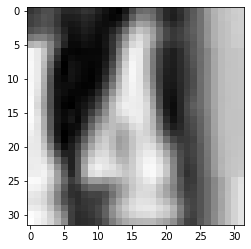

In [73]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = model_2.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

This model is far better than the previous model . The test accuracy is around 70% which is average performing model.

**`MODEL_3`**

In [98]:
def model_3():
  model_3 = Sequential() 
  model_3.add(Dense(50, input_shape = (1024,), activation= "relu"))
  model_3.add(BatchNormalization())
  model_3.add(Dense(50, activation= "relu"))
  model_3.add(BatchNormalization())
  model_3.add(Dense(50, activation= "sigmoid"))
  model_3.add(BatchNormalization())
  model_3.add(Dense(10, activation= "softmax"))
  ada = optimizers.Adam(lr = 0.001)
  model_3.compile(optimizer = ada, loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model_3

In this model we do normalise the inputs for each layer

In [99]:
model_3= model_3()
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_35 (Batc (None, 50)                200       
_________________________________________________________________
dense_60 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_36 (Batc (None, 50)                200       
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_37 (Batc (None, 50)                200       
_________________________________________________________________
dense_62 (Dense)             (None, 10)              

In [ ]:

history_3 = model_3.fit(X_train, y_train, epochs = 100, batch_size = 1000, verbose = 1, validation_data=(X_test, y_test))

In [81]:
res_3 = model_3.evaluate(X_test, y_test)
res_3[1]


563/563 [==============================] - 1s 2ms/step - loss: 1.0031 - accuracy: 0.7266


0.7265555262565613

probabilities for 10th image [6.1194937e-06 1.0057158e-03 6.1379515e-06 5.9949001e-04 9.9252921e-01
 1.9068085e-03 2.3469067e-05 1.8097789e-07 3.9225519e-03 3.1359738e-07]
predicted image label 4


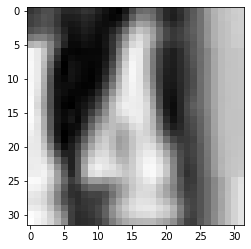

In [91]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = model_3.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

The test acccuracy is average but better than model_2. We are trying to reduce overfitting it by Adding dropout layer

In [100]:
def model_4():
  model_4 = Sequential() 
  model_4.add(Dense(50, input_shape = (1024,), activation= "relu"))
  model_4.add(BatchNormalization())
  model_4.add(Dropout(0.1))
  model_4.add(Dense(50, activation= "relu"))
  model_4.add(BatchNormalization())
  model_4.add(Dropout(0.1))
  
  model_4.add(Dense(50, activation= "sigmoid"))
  model_4.add(BatchNormalization())
  model_4.add(Dropout(0.1))
  model_4.add(Dense(10, activation= "softmax"))
  ada = optimizers.Adam(lr = 0.001)
  model_4.compile(optimizer = ada, loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model_4

In [101]:
a = model_4()
a.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_38 (Batc (None, 50)                200       
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_39 (Batc (None, 50)                200       
_________________________________________________________________
dropout_25 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 50)              

In [ ]:
history_4 = a.fit(X_train, y_train, epochs = 100, batch_size = 1000, verbose = 1, validation_data= (X_test, y_test))

In [85]:
  res_4 = a.evaluate(X_test, y_test)
res_4[1]

563/563 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.7920


0.7919999957084656

probabilities for 10th image [2.6649007e-04 4.2005875e-03 1.6370307e-04 9.2357637e-05 9.9126500e-01
 8.4976156e-05 1.4935805e-03 2.2058159e-05 2.2312354e-03 1.7993175e-04]
predicted image label 4


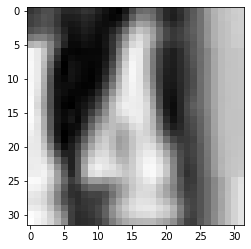

In [86]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = a.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

The test accuracy for model_4 has improved. Lets try to improve it .

MODEL 5

Lets try to do some weight initialisation 

In [102]:
def model_5():
  model_5 = Sequential() 
  model_5.add(Dense(50, input_shape = (1024,), activation= "relu", kernel_initializer='he_normal'))
  model_5.add(BatchNormalization())
  model_5.add(Dropout(0.1))
  model_5.add(Dense(50, activation= "relu", kernel_initializer='he_normal'))
  model_5.add(BatchNormalization())
  model_5.add(Dropout(0.1))
  
  model_5.add(Dense(50, activation= "sigmoid", kernel_initializer='he_normal'))
  model_5.add(BatchNormalization())
  model_5.add(Dropout(0.1))
  model_5.add(Dense(10, activation= "softmax", kernel_initializer='he_normal'))
  ada = optimizers.Adam(lr = 0.001)
  model_5.compile(optimizer = ada, loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model_5

In [103]:
b = model_5()
b.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_41 (Batc (None, 50)                200       
_________________________________________________________________
dropout_27 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_42 (Batc (None, 50)                200       
_________________________________________________________________
dropout_28 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 50)              

In [ ]:
history_5 = b.fit(X_train, y_train, epochs = 100, batch_size = 1000, verbose = 1)

In [89]:
res_5 = b.evaluate(X_test, y_test)
res_5[1]

563/563 [==============================] - 1s 1ms/step - loss: 0.7577 - accuracy: 0.7680


0.7680000066757202

probabilities for 10th image [3.0544717e-05 3.7399479e-04 2.8974673e-05 2.9510580e-05 9.9818355e-01
 5.8094789e-05 2.6494052e-04 1.4598330e-06 9.8735478e-04 4.1593419e-05]
predicted image label 4


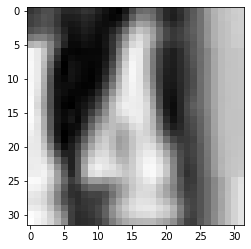

In [90]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = b.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

The test accuracy has improve but we need improve it

en l

MODEL 6

Lets try to change the no of hidden layers and the no of neurons in every layer

In [104]:
def model_6():
  model_6 = Sequential() 
  model_6.add(Dense(256, input_shape = (1024,)))
  model_6.add(Activation('relu'))
  model_6.add(BatchNormalization())
  
  model_6.add(Dense(256))
  model_6.add(BatchNormalization())
  model_6.add(Activation('relu'))

  model_6.add(Dense(10))
  model_6.add(Activation('softmax'))

  ada_2 = optimizers.Adam(lr = 0.0002977345377574985)
  model_6.compile(optimizer=ada_2, loss="categorical_crossentropy", metrics = ['accuracy'])

  return model_6


In [105]:
model_6 = model_6()
model_6.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 256)               1024      
_________________________________________________________________
dense_72 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_45 (Batc (None, 256)               1024      
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 10)              

In [ ]:
history_6 = model_6.fit(X_train, y_train, batch_size = 1000, epochs= 100, verbose = 1, validation_data=(X_test,y_test))

In [35]:
res_6 = model_6.evaluate(X_test, y_test)
res_6[1]

563/563 [==============================] - 1s 2ms/step - loss: 0.8152 - accuracy: 0.7925


0.7925000190734863

probabilities for 10th image [2.31040900e-07 1.83310058e-05 1.40111985e-11 1.30758588e-06
 9.99600470e-01 2.27546479e-06 3.76944576e-04 2.20263829e-09
 5.10328334e-07 5.27477217e-09]
predicted image label 4


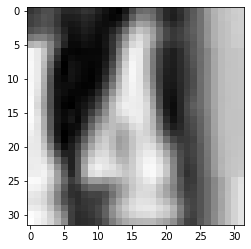

In [57]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = model_6.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

We see that for this model, the test accuracy has increased a little but model is overfitting. we do some regularisation

***MODEL_7***

In [14]:
def model_7(beta1, beta2, lr):
  Beta1 =beta1
  Beta2= beta2
  learning_rate= lr
  model_7 = Sequential() 
  model_7.add(Dense(256, input_shape = (1024,)))
  model_7.add(Activation('relu'))
  model_7.add(BatchNormalization())
  model_7.add(Dropout(0.1))
  
  model_7.add(Dense(256))
  model_7.add(BatchNormalization())
  model_7.add(Activation('relu'))
  model_7.add(Dropout(0.1))

  model_7.add(Dense(256))
  model_7.add(BatchNormalization())
  model_7.add(Activation('relu'))
  model_7.add(Dropout(0.1))


  model_7.add(Dense(10))
  model_7.add(Activation('softmax'))

  ada_3 = optimizers.Adam(lr = learning_rate, beta_1= Beta1, beta_2 = Beta2, epsilon=1e-07)
  model_7.compile(optimizer=ada_3, loss="categorical_crossentropy", metrics = ['accuracy'])
  #callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)
  model_7.fit(X_train, y_train, batch_size = 1000, epochs= 100, verbose = 1, validation_data=(X_test,y_test)) 
  print("summary of model" , model_7.summary())
  RES_7 = model_7.evaluate(X_test, y_test)

  return model_7

In [ ]:
model_7(0.9, 0.99, 0.001)

Epoch 1/100
42/42 [==============================] - 3s 66ms/step - loss: 1.8333 - accuracy: 0.3762 - val_loss: 2.0293 - val_accuracy: 0.4512
Epoch 2/100
42/42 [==============================] - 3s 62ms/step - loss: 1.1017 - accuracy: 0.6577 - val_loss: 1.6401 - val_accuracy: 0.5782
Epoch 3/100
42/42 [==============================] - 3s 62ms/step - loss: 0.9320 - accuracy: 0.7119 - val_loss: 1.4808 - val_accuracy: 0.5977
Epoch 4/100
42/42 [==============================] - 3s 63ms/step - loss: 0.8472 - accuracy: 0.7385 - val_loss: 1.3460 - val_accuracy: 0.6339
Epoch 5/100
42/42 [==============================] - 3s 63ms/step - loss: 0.7868 - accuracy: 0.7582 - val_loss: 1.2079 - val_accuracy: 0.6337
Epoch 6/100
42/42 [==============================] - 3s 62ms/step - loss: 0.7288 - accuracy: 0.7745 - val_loss: 1.1700 - val_accuracy: 0.6238
Epoch 7/100
42/42 [==============================] - 3s 62ms/step - loss: 0.6874 - accuracy: 0.7881 - val_loss: 1.1508 - val_accuracy: 0.6064
Epoch 

In [ ]:
model_7(0.9, 0.99, 1000)


Epoch 1/100
42/42 [==============================] - 3s 67ms/step - loss: 3472424.5000 - accuracy: 0.1013 - val_loss: 1086332800.0000 - val_accuracy: 0.0972
Epoch 2/100
42/42 [==============================] - 3s 63ms/step - loss: 789.8948 - accuracy: 0.0980 - val_loss: 111635312.0000 - val_accuracy: 0.0998
Epoch 3/100
42/42 [==============================] - 3s 62ms/step - loss: 643.9875 - accuracy: 0.0983 - val_loss: 84264768.0000 - val_accuracy: 0.1021
Epoch 4/100
42/42 [==============================] - 3s 63ms/step - loss: 582.9138 - accuracy: 0.1002 - val_loss: 81857688.0000 - val_accuracy: 0.1014
Epoch 5/100
42/42 [==============================] - 3s 62ms/step - loss: 534.3077 - accuracy: 0.1001 - val_loss: 90358344.0000 - val_accuracy: 0.1007
Epoch 6/100
42/42 [==============================] - 3s 63ms/step - loss: 572.1898 - accuracy: 0.0988 - val_loss: 104139256.0000 - val_accuracy: 0.1002
Epoch 7/100
42/42 [==============================] - 3s 63ms/step - loss: 623.3505 - a

KeyboardInterrupt: ignored

In [ ]:
The loss is too high lets increase learning rate to 1

In [ ]:
model_7(0.9, 0.99, 1)

Epoch 1/100
42/42 [==============================] - 3s 66ms/step - loss: 6.2197 - accuracy: 0.1011 - val_loss: 2118.6411 - val_accuracy: 0.0971
Epoch 2/100
42/42 [==============================] - 3s 62ms/step - loss: 2.3118 - accuracy: 0.1002 - val_loss: 63.2904 - val_accuracy: 0.0981
Epoch 3/100
42/42 [==============================] - 3s 61ms/step - loss: 2.3119 - accuracy: 0.0994 - val_loss: 3.8652 - val_accuracy: 0.1017
Epoch 4/100
42/42 [==============================] - 3s 61ms/step - loss: 2.3096 - accuracy: 0.1010 - val_loss: 2.4654 - val_accuracy: 0.1017
Epoch 5/100
42/42 [==============================] - 3s 61ms/step - loss: 2.3126 - accuracy: 0.1018 - val_loss: 2.4482 - val_accuracy: 0.1002
Epoch 6/100
42/42 [==============================] - 3s 62ms/step - loss: 2.3167 - accuracy: 0.1002 - val_loss: 2.4692 - val_accuracy: 0.1002
Epoch 7/100
42/42 [==============================] - 3s 62ms/step - loss: 2.3119 - accuracy: 0.0981 - val_loss: 2.5161 - val_accuracy: 0.1007
Ep

In [ ]:
model_7(0.9, 0.99, 0.0001)

Epoch 1/100
42/42 [==============================] - 3s 67ms/step - loss: 2.3988 - accuracy: 0.1588 - val_loss: 2.2835 - val_accuracy: 0.1361
Epoch 2/100
42/42 [==============================] - 3s 62ms/step - loss: 2.0265 - accuracy: 0.2965 - val_loss: 2.2152 - val_accuracy: 0.2660
Epoch 3/100
42/42 [==============================] - 3s 63ms/step - loss: 1.7337 - accuracy: 0.4247 - val_loss: 2.1120 - val_accuracy: 0.3476
Epoch 4/100
42/42 [==============================] - 3s 62ms/step - loss: 1.5156 - accuracy: 0.5132 - val_loss: 1.9162 - val_accuracy: 0.5012
Epoch 5/100
42/42 [==============================] - 3s 63ms/step - loss: 1.3490 - accuracy: 0.5752 - val_loss: 1.7277 - val_accuracy: 0.5732
Epoch 6/100
42/42 [==============================] - 3s 63ms/step - loss: 1.2334 - accuracy: 0.6171 - val_loss: 1.5343 - val_accuracy: 0.6282
Epoch 7/100
42/42 [==============================] - 3s 63ms/step - loss: 1.1435 - accuracy: 0.6486 - val_loss: 1.3377 - val_accuracy: 0.6672
Epoch 

In [ ]:
model_7(0.9, 0.99, 0.000001)

Epoch 1/100
42/42 [==============================] - 3s 66ms/step - loss: 2.7498 - accuracy: 0.1025 - val_loss: 2.3187 - val_accuracy: 0.1020
Epoch 2/100
42/42 [==============================] - 3s 63ms/step - loss: 2.7326 - accuracy: 0.1043 - val_loss: 2.3193 - val_accuracy: 0.1013
Epoch 3/100
42/42 [==============================] - 3s 63ms/step - loss: 2.7244 - accuracy: 0.1034 - val_loss: 2.3256 - val_accuracy: 0.1018
Epoch 4/100
42/42 [==============================] - 3s 64ms/step - loss: 2.7119 - accuracy: 0.1063 - val_loss: 2.3341 - val_accuracy: 0.1016
Epoch 5/100
42/42 [==============================] - 3s 62ms/step - loss: 2.7052 - accuracy: 0.1061 - val_loss: 2.3442 - val_accuracy: 0.1016
Epoch 6/100
42/42 [==============================] - 3s 63ms/step - loss: 2.6883 - accuracy: 0.1104 - val_loss: 2.3558 - val_accuracy: 0.1051
Epoch 7/100
42/42 [==============================] - 3s 63ms/step - loss: 2.6803 - accuracy: 0.1126 - val_loss: 2.3682 - val_accuracy: 0.1070
Epoch 

So we see that when the learning rate is between 0.1 to 0.0001 the test accuracy is coming above 79%

So lets  coarse search for 5 times with learning rate between 0.10 and 0.0001 for 100 epochs.We will randomly pick four values between 0.1 and 0.0001 and then calculate accuracy for each lr

In [15]:
import numpy as np

In [16]:
import math

for k in range (1,5):
  lr = math.pow(10, np.random.uniform(-5,-1))
  best_accuracy = model_7(0.9, 0.99, lr)
  print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}\n".format(k, 100, best_accuracy, lr))

Epoch 1/100
42/42 [==============================] - 3s 70ms/step - loss: 2.4250 - accuracy: 0.1582 - val_loss: 5.2255 - val_accuracy: 0.1928
Epoch 2/100
42/42 [==============================] - 3s 65ms/step - loss: 1.6515 - accuracy: 0.4000 - val_loss: 2.5735 - val_accuracy: 0.3752
Epoch 3/100
42/42 [==============================] - 3s 65ms/step - loss: 1.2446 - accuracy: 0.5878 - val_loss: 1.4348 - val_accuracy: 0.5491
Epoch 4/100
42/42 [==============================] - 3s 65ms/step - loss: 1.0560 - accuracy: 0.6594 - val_loss: 1.7865 - val_accuracy: 0.4658
Epoch 5/100
42/42 [==============================] - 3s 65ms/step - loss: 0.9438 - accuracy: 0.6976 - val_loss: 1.1101 - val_accuracy: 0.6373
Epoch 6/100
42/42 [==============================] - 3s 65ms/step - loss: 0.8611 - accuracy: 0.7238 - val_loss: 1.3646 - val_accuracy: 0.5554
Epoch 7/100
42/42 [==============================] - 3s 65ms/step - loss: 0.8011 - accuracy: 0.7439 - val_loss: 1.2014 - val_accuracy: 0.6151
Epoch 

So for model_7 with learning rate = 0.0002977345377574985 we get test accuracy almost equal to 86% which is the highest till now

In [106]:
  model_7 = Sequential() 
  model_7.add(Dense(256, input_shape = (1024,)))
  model_7.add(Activation('relu'))
  model_7.add(BatchNormalization())
  model_7.add(Dropout(0.1))
  
  model_7.add(Dense(256))
  model_7.add(BatchNormalization())
  model_7.add(Activation('relu'))
  model_7.add(Dropout(0.1))

  model_7.add(Dense(256))
  model_7.add(BatchNormalization())
  model_7.add(Activation('relu'))
  model_7.add(Dropout(0.1))


  model_7.add(Dense(10))
  model_7.add(Activation('softmax'))

  ada_3 = optimizers.Adam(lr = 0.0002977345377574985)
  model_7.compile(optimizer=ada_3, loss="categorical_crossentropy", metrics = ['accuracy'])
  #callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)
  #model_7.fit(X_train, y_train, batch_size = 1000, epochs= 100, verbose = 1, validation_data=(X_test,y_test)) 



In [107]:
model_7.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
_________________________________________________________________
activation_27 (Activation)   (None, 256)             

In [19]:
model_7.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8501


[0.5249767899513245, 0.8500555753707886]

probabilities for 10th image [4.3330710e-06 2.4421807e-04 5.7140905e-09 2.4765029e-08 9.9974698e-01
 3.8355341e-09 3.2894177e-06 1.1722869e-09 1.1573600e-06 1.8946908e-08]
predicted image label 4


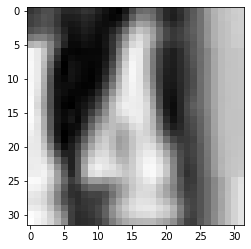

In [61]:
import matplotlib.pyplot as plt

plt.imshow(X_test[10000].reshape(32,32), cmap = 'gray')
y_pred = model_7.predict(X_test)
print("probabilities for 10th image", y_pred[10000])

print("predicted image label", np.argmax(y_pred[10000]))

# So we find that model_7 with Learning Rate = 0.0002977345377574985 is the best model for this dataset

# So we find that model_4 has much less parameters and less deeper than model_7 so complexity and memory usage is much less than Model_7. So model_4 can get more preference over model_7 in terms of industrial use though it has less accuracy than model_7